In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from random import seed
from random import random

In [2]:
traindataset=pd.read_csv('train-perceptron.txt',sep=" ",header=None)
trn=traindataset.to_numpy();
#print(trn)

In [3]:
class1 =[([i[0],i[1],i[2]]) for i in trn if i[2] == 1]
class1 = np.array(class1)
class2 =[([i[0],i[1],i[2]]) for i in trn if i[2] == 2]
class2 = np.array(class2)
Trainx = np.concatenate((class1, class2))
#print(Trainx)

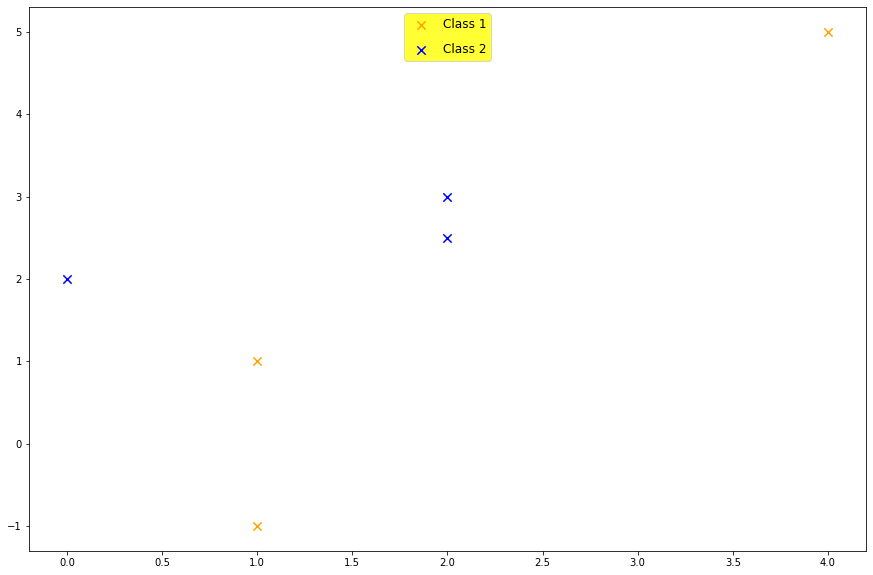

In [4]:
fig, axis = plt.subplots()
fig.set_figheight(10)
fig.set_figwidth(15)

#scatting train values
axis.scatter(class1[:,0],class1[:,1],marker='x',color='orange',s=70,label='Class 1')
axis.scatter(class2[:,0],class2[:,1],marker='x',color='blue',s=70,label='Class 2')
#labeling decoration 
legend = axis.legend(loc='upper center',fontsize='large',labelspacing=1.0)
legend.get_frame().set_facecolor('yellow')

In [5]:
y=np.ones([6,6])
y[:,0]=Trainx[:,0]**2
y[:,1]=Trainx[:,1]**2
y[:,2]=Trainx[:,0]*Trainx[:,1]
y[:,3]=Trainx[:,0]
y[:,4]=Trainx[:,1]
y[3:6,:]*=-1
#print(a)

In [6]:
wz = np.zeros([6])
wo = np.ones([6])
seed(2)
ra = []
for _ in range(6):
    value = random()
    ra.append(value)
    
wr =np.array(ra)
#print(wr)
    
TrainX = np.concatenate((class1, class2))
w =np.concatenate((wz,wo,wr))
w = w.reshape(3,6)
#print(w.ndim)
#print(w)
alp =np.round(np.arange(.1,1.1,.1),1)
#print(alp)
totalconverge=[]
for i in w:
    converge=[]
    #print(i)
    for j in alp:
        #print(j)
        temp = i
        cc=0
        itr=0
        while itr<200 and cc<len(y):
            itr += 1
            cc=0
            for ix in y:
                
                g =np.dot(ix,np.transpose(temp).reshape(6,1))
                #print(temp)
                if g <= 0:
                    temp = temp +j*ix
                   # print(temp)
                else:
                    cc = cc +1
        converge.append(itr)
        #print(converge)
    totalconverge.append(converge)  
#print(totalconverge)

In [7]:
totalconverge1 = []
for i in w:
    converge1=[]
    #print(i)
    for j in alp:
        #print(j)
        temp = i
        itr=0
        flag=False
        while itr<200 and flag!=True:
            itr += 1
            g =np.dot(y,np.transpose(temp)).reshape(6,1)
                #print(temp)
            mc=np.array(np.where(g<=0.0))
            temp = temp+np.sum(y[mc[0],:],axis=0)*j
            #print(temp)
            if len(mc[0]) == 0 :
                flag = True        
        converge1.append(itr)
        #print(converge1)
    totalconverge1.append(converge1)  
#print(totalconverge1)

[0 1 2 3 4 5 6 7 8 9]


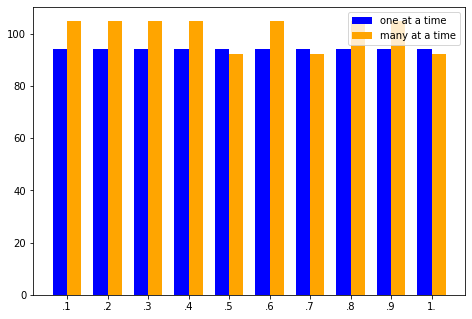

In [8]:
x=np.arange(10)
print(x)
width = 0.35
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(x-width/2,totalconverge[0],width,color="blue")
ax.bar(x+width/2,totalconverge1[0],width,color="orange")
plt.xticks(x, ('.1', '.2', '.3', '.4','.5','.6','.7','.8','.9','1.'))
ax.legend(labels=['one at a time', 'many at a time'])



#ax.bar(alp,tconverge[1],width)
plt.show()

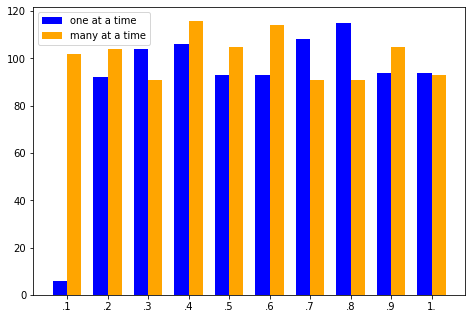

In [9]:
x=np.arange(10)
#print(x)
width = 0.35
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(x-width/2,totalconverge[1],width,color="blue")
ax.bar(x+width/2,totalconverge1[1],width,color="orange")
plt.xticks(x, ('.1', '.2', '.3', '.4','.5','.6','.7','.8','.9','1.'))
ax.legend(labels=['one at a time', 'many at a time'])

#ax.bar(alp,tconverge[1],width)
plt.show()

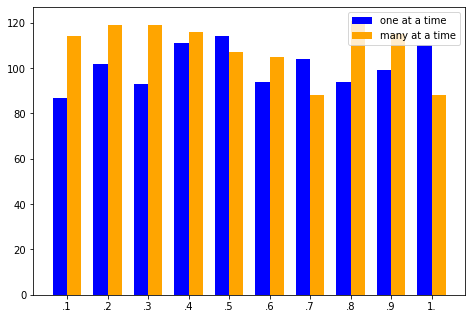

In [10]:
x=np.arange(10)
#print(x)
width = 0.35
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(x-width/2,totalconverge[2],width,color="blue")
ax.bar(x+width/2,totalconverge1[2],width,color="orange")
plt.xticks(x, ('.1', '.2', '.3', '.4','.5','.6','.7','.8','.9','1.'))
ax.legend(labels=['one at a time', 'many at a time'])

#ax.bar(alp,tconverge[1],width)
plt.show()

In [12]:
print('\033[1m' + 'Initial Weight Vector All Zeros' + '\033[0m')
plotdata = pd.DataFrame({
    "learning rate":alp.tolist(),
     "one at a time":totalconverge[0],
    "many at a time":totalconverge1[0]
    },
    
)
plotdata

Initial Weight Vector All Zeros


,learning rate,one at a time,many at a time
0,0.1,94,105
1,0.2,94,105
2,0.3,94,105
3,0.4,94,105
4,0.5,94,92
5,0.6,94,105
6,0.7,94,92
7,0.8,94,105
8,0.9,94,105
9,1.0,94,92


In [13]:
print('\033[1m' + 'Initial Weight Vector All Ones' + '\033[0m')
plotdata = pd.DataFrame({
    "learning rate":alp.tolist(),
     "one at a time":totalconverge[1],
    "many at a time":totalconverge1[1]
    },
    
)
plotdata

Initial Weight Vector All Ones


,learning rate,one at a time,many at a time
0,0.1,6,102
1,0.2,92,104
2,0.3,104,91
3,0.4,106,116
4,0.5,93,105
5,0.6,93,114
6,0.7,108,91
7,0.8,115,91
8,0.9,94,105
9,1.0,94,93


In [14]:
print('\033[1m' + 'Initial Weight Vector Random Seed Values' + '\033[0m')
plotdata = pd.DataFrame({
    "learning rate":alp.tolist(),
     "one at a time":totalconverge[2],
    "many at a time":totalconverge1[2]
    },
    
)
plotdata

Initial Weight Vector Random Seed Values


,learning rate,one at a time,many at a time
0,0.1,87,114
1,0.2,102,119
2,0.3,93,119
3,0.4,111,116
4,0.5,114,107
5,0.6,94,105
6,0.7,104,88
7,0.8,94,121
8,0.9,99,115
9,1.0,110,88
